In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager

In [145]:
df = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\Data\pizza_tutorial.csv")

In [146]:
df['Player'] = df['Player'].str.split('\\').str[0]

In [147]:
df = df.loc[(df['Pos'] == 'DF') & (df['90s'] >= 15)]

In [148]:
df[df['Squad'] == 'Burnley']

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,...,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
276,277,Matthew Lowton,eng ENG,DF,Burnley,31-340,1989,31.0,2.03,1.10,...,1.13,2.39,3.77,3.32,1.13,1.87,1.48,3.52,3.42,0.06
309,310,Ben Mee,eng ENG,DF,Burnley,31-234,1989,27.9,1.08,0.65,...,0.54,1.47,2.90,1.86,0.39,2.04,0.86,1.94,8.35,0.04
451,452,James Tarkowski,eng ENG,DF,Burnley,28-177,1992,33.0,2.09,1.15,...,0.64,2.82,4.58,1.97,0.27,1.94,1.48,3.58,6.61,0.03
454,455,Charlie Taylor,eng ENG,DF,Burnley,27-239,1993,24.0,1.79,0.96,...,0.96,2.54,3.46,3.58,1.42,2.58,1.04,2.83,3.50,0.04


In [149]:
df = df.drop(['Tkls vs Dribbles','Def 3rd Press','Att 3rd Press','Mid 3rd Press','Tkl+Int','Errors','Rk', 'Nation', 'Pos', 'Squad', 'Age', 'Born'], axis=1).reset_index()   

In [150]:
params = list(df.columns)
params = params[2:]
params

['90s',
 'Tackles',
 'Tkls Won',
 'Dribbled Past',
 'Successful Pressures',
 'Blocks',
 'Interceptions',
 'Clearances']

In [151]:
player = df.loc[df['Player'] == 'Ben Mee'].reset_index()

In [152]:
player = list(player.loc[0])

In [153]:
player = player[3:]

In [154]:
player

[27.9, 1.08, 0.65, 0.54, 1.47, 2.04, 0.86, 8.35]

In [155]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]], player[x])))

In [156]:
values

[70, 24, 23, 30, 3, 63, 21, 100]

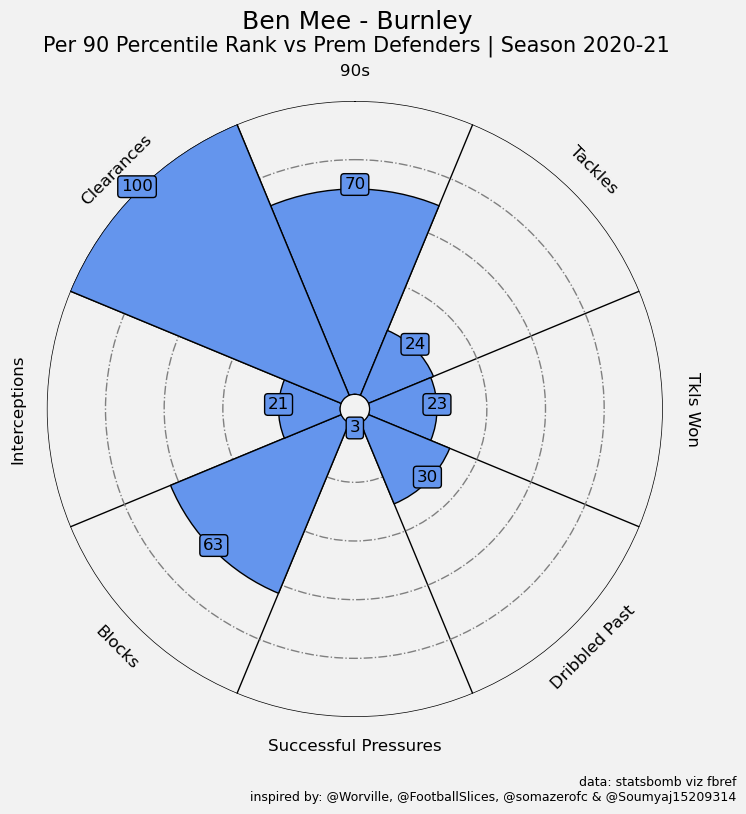

In [158]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Ben Mee - Burnley", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Percentile Rank vs Prem Defenders | Season 2020-21",
    size=15,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000", ha="right"
)

plt.show()